In [113]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import poly1d
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [162]:
#x = np.loadtxt('API_BGD_DS2_en_csv_v2_1224638.csv',dtype=str,delimiter=',')
df = pd.read_csv("API_BGD_DS2_en_csv_v2_1224638.csv", error_bad_lines=False)
#df = df.drop(columns=['Country Name','Indicator Name', 'Country Code', 'Indicator Code'])
gdp = df.iloc[46:47, 4:-1]
#gdp.columns = pd.to_datetime(gdp.columns, format='%Y')

#plt.bar(list(range(1960,2020)), list(gdp.iloc[0]))
#plt.show()
gdp = gdp.T
gdp.to_csv('gdp-BD.csv')

/home/lio/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


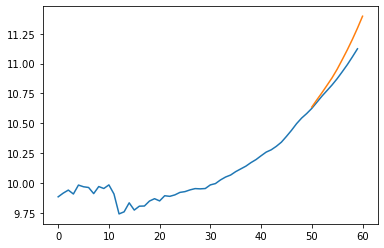

In [134]:
gdp_diff = gdp.diff(periods=1)
gdp_diff = gdp_diff[1:]
#gdp_diff.plot()
gdp_diff2 = gdp_diff.diff(periods=1)
gdp_diff2 = gdp_diff2[1:]

model = AR(gdp.values[:50])
model_fit = model.fit()
predict = model_fit.predict(start=50,end=60)
plt.plot(gdp.values)
plt.plot(list(range(50,61)), predict)

/home/lio/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


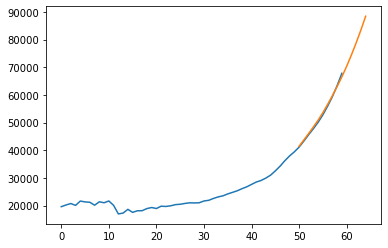

In [158]:
model_arima = ARIMA(gdp.values[:50], order=(6,2,0))
model_arima_fit = model_arima.fit()
predict_arima = model_arima_fit.forecast(steps=15)
plt.plot(np.exp(gdp.values))
plt.plot(list(range(50,65)), np.exp(predict_arima[0]))

Text(0.5, 1.0, 'Kalman filter estimate of average')

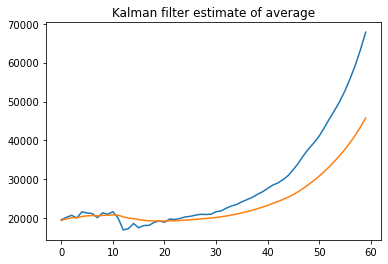

In [120]:

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 2000,
                  initial_state_covariance = 100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(list(gdp.iloc[0]))
#state_means = pd.Series(state_means.flatten(), index=x.index)

# Compute the rolling mean with various lookback windows
#mean30 = x.rolling(window = 30).mean()
#mean60 = x.rolling(window = 60).mean()
#mean90 = x.rolling(window = 90).mean()

# Plot original data and estimated mean
plt.plot(list(gdp.iloc[0]))
plt.plot(state_means)
#plt.plot(x)
#plt.plot(mean30)
#plt.plot(mean60)
#plt.plot(mean90)
plt.title('Kalman filter estimate of average')
#plt.legend(['Kalman Estimate', 'X', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])